In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data contoh (data time series)
data = np.array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])



In [3]:
# Panjang data
n = len(data)



In [4]:
# Membangun model Naive
def naive_forecast(data):
    predictions = []
    for i in range(1, len(data)):
        predictions.append(data[i - 1])  # Prediksi = nilai terakhir yang diamati
    return predictions

# Membuat prediksi menggunakan model Naive
naive_predictions = naive_forecast(data)



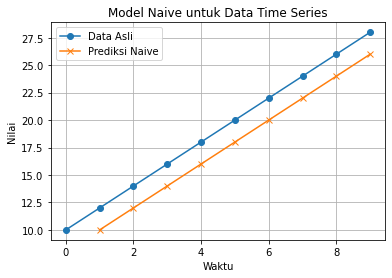

Prediksi untuk waktu selanjutnya: 26


In [5]:
# Plot data asli dan prediksi Naive
plt.plot(data, label='Data Asli', marker='o')
plt.plot(range(1, n), naive_predictions, label='Prediksi Naive', marker='x')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.title('Model Naive untuk Data Time Series')
plt.legend()
plt.grid(True)
plt.show()

# Contoh prediksi untuk waktu selanjutnya (misalnya, waktu ke-11)
next_time_step = naive_predictions[-1]
print(f'Prediksi untuk waktu selanjutnya: {next_time_step}')


## Naive untuk musiman

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Data contoh (data time series musiman)
data = np.array([550,350,250,540,575,400,350,550,750,500,400,650,850,600,450,700])

# Panjang data
n = len(data)

# Periode musiman (dalam kasus ini, 12 bulan)
seasonal_period = 4

# Membangun model Naive untuk data musiman
def seasonal_naive_forecast(data, seasonal_period):
    predictions = []
    for i in range(seasonal_period, len(data)):
        predictions.append(data[i - seasonal_period])  # Prediksi = nilai periode musiman pada tahun sebelumnya
    return predictions



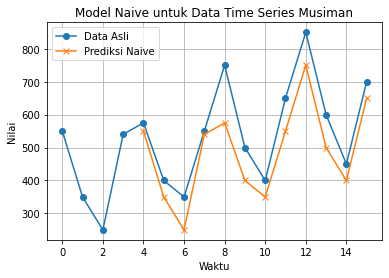

Prediksi untuk waktu selanjutnya: 650


In [6]:
# Membuat prediksi menggunakan model Naive untuk data musiman
naive_predictions = seasonal_naive_forecast(data, seasonal_period)

# Plot data asli dan prediksi Naive
plt.plot(data, label='Data Asli', marker='o')
plt.plot(range(seasonal_period, n), naive_predictions, label='Prediksi Naive', marker='x')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.title('Model Naive untuk Data Time Series Musiman')
plt.legend()
plt.grid(True)
plt.show()

# Contoh prediksi untuk waktu selanjutnya (misalnya, bulan ke-21)
next_time_step = naive_predictions[-1]
print(f'Prediksi untuk waktu selanjutnya: {next_time_step}')

##Membandingkan Naive

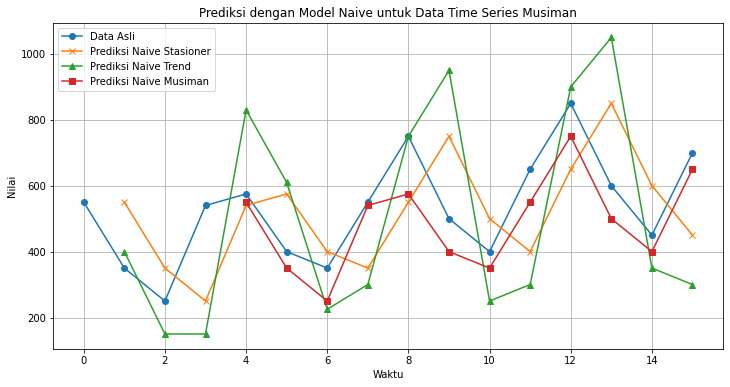

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Data contoh (data time series musiman)
data = np.array([550, 350, 250, 540, 575, 400, 350, 550, 750, 500, 400, 650, 850, 600, 450, 700])
n = len(data)

# Model Naive Stasioner
def naive_stationary_forecast(data):
    predictions = []
    for i in range(1, len(data)):
        predictions.append(data[i - 1])
    return predictions

# Model Naive Trend
def naive_trend_forecast(data):
    predictions = []
    for i in range(1, len(data)):
        predictions.append(data[i - 1] + (data[i - 1] - data[i - 2]))
    return predictions

# Model Naive Musiman
def naive_seasonal_forecast(data, seasonal_period):
    predictions = []
    for i in range(seasonal_period, len(data)):
        predictions.append(data[i - seasonal_period])
    return predictions

# Membuat prediksi menggunakan ketiga model Naive
naive_stationary_predictions = naive_stationary_forecast(data)
naive_trend_predictions = naive_trend_forecast(data)
seasonal_period = 4  # Periode musiman (dalam kasus ini, 4)
naive_seasonal_predictions = naive_seasonal_forecast(data, seasonal_period)

# Plot data asli dan prediksi Naive
plt.figure(figsize=(12, 6))
plt.plot(data, label='Data Asli', marker='o')
plt.plot(range(1, n), naive_stationary_predictions, label='Prediksi Naive Stasioner', marker='x')
plt.plot(range(1, n), naive_trend_predictions, label='Prediksi Naive Trend', marker='^')
plt.plot(range(seasonal_period, n), naive_seasonal_predictions, label='Prediksi Naive Musiman', marker='s')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.title('Prediksi dengan Model Naive untuk Data Time Series Musiman')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Menghitung Prediksi dengan Ketiga Model Naive
naive_stationary_predictions = naive_stationary_forecast(data)
naive_trend_predictions = naive_trend_forecast(data)
seasonal_period = 4  # Periode musiman (dalam kasus ini, 4)
naive_seasonal_predictions = naive_seasonal_forecast(data, seasonal_period)

# Menghitung Selisih antara Prediksi dan Data Asli
def calculate_squared_error(predictions, actual_data):
    squared_errors = [(predictions[i] - actual_data[i]) ** 2 for i in range(len(predictions))]
    return squared_errors

squared_errors_stationary = calculate_squared_error(naive_stationary_predictions, data[1:])
squared_errors_trend = calculate_squared_error(naive_trend_predictions, data[1:])
squared_errors_seasonal = calculate_squared_error(naive_seasonal_predictions, data[seasonal_period:])

# Menghitung MSE
mse_stationary = np.mean(squared_errors_stationary)
mse_trend = np.mean(squared_errors_trend)
mse_seasonal = np.mean(squared_errors_seasonal)

print(f"MSE Naive Stasioner: {mse_stationary:.2f}")
print(f"MSE Naive Trend: {mse_trend:.2f}")
print(f"MSE Naive Musiman: {mse_seasonal:.2f}")

MSE Naive Stasioner: 38063.33
MSE Naive Trend: 71623.33
MSE Naive Musiman: 7612.50


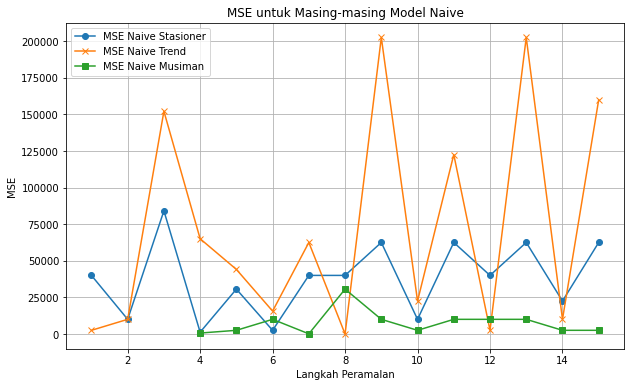

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Data contoh (data time series musiman)
data = np.array([550, 350, 250, 540, 575, 400, 350, 550, 750, 500, 400, 650, 850, 600, 450, 700])

# Model Naive Stasioner
def naive_stationary_forecast(data):
    mse_values = []  # List untuk menyimpan MSE pada setiap langkah
    for i in range(1, len(data)):
        prediction = data[i - 1]
        mse = (prediction - data[i]) ** 2
        mse_values.append(mse)
    return mse_values

# Model Naive Trend
def naive_trend_forecast(data):
    mse_values = []  # List untuk menyimpan MSE pada setiap langkah
    for i in range(1, len(data)):
        prediction = data[i - 1] + (data[i - 1] - data[i - 2])
        mse = (prediction - data[i]) ** 2
        mse_values.append(mse)
    return mse_values

# Model Naive Musiman
def naive_seasonal_forecast(data, seasonal_period):
    mse_values = []  # List untuk menyimpan MSE pada setiap langkah
    for i in range(seasonal_period, len(data)):
        prediction = data[i - seasonal_period]
        mse = (prediction - data[i]) ** 2
        mse_values.append(mse)
    return mse_values

# Menghitung MSE dari masing-masing model Naive
mse_values_stationary = naive_stationary_forecast(data)
mse_values_trend = naive_trend_forecast(data)
seasonal_period = 4  # Periode musiman (dalam kasus ini, 4)
mse_values_seasonal = naive_seasonal_forecast(data, seasonal_period)

# Plot MSE untuk masing-masing model Naive
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(data)), mse_values_stationary, label='MSE Naive Stasioner', marker='o')
plt.plot(range(1, len(data)), mse_values_trend, label='MSE Naive Trend', marker='x')
plt.plot(range(seasonal_period, len(data)), mse_values_seasonal, label='MSE Naive Musiman', marker='s')
plt.xlabel('Langkah Peramalan')
plt.ylabel('MSE')
plt.title('MSE untuk Masing-masing Model Naive')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Menghitung rata-rata MSE
mse_avg_stationary = np.mean(mse_values_stationary)
mse_avg_trend = np.mean(mse_values_trend)
mse_avg_seasonal = np.mean(mse_values_seasonal)

print(f"Rata-rata MSE Naive Stasioner: {mse_avg_stationary:.2f}")
print(f"Rata-rata MSE Naive Trend: {mse_avg_trend:.2f}")
print(f"Rata-rata MSE Naive Musiman: {mse_avg_seasonal:.2f}")

Rata-rata MSE Naive Stasioner: 38063.33
Rata-rata MSE Naive Trend: 71623.33
Rata-rata MSE Naive Musiman: 7612.50
